## Importing required modules

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, pairwise_distances

####  Experiments ran with Decision Tree

#### This notebook contains the following tests which we have tried with different parameters of Decision Trees.
#### 1. We had tried with different max_depths for Decision Trees and plotted the elbow curve.
#### 2. Along with different max_depths as mentioned in step-1, we have also experimented with other parameters like criterion_values and splitter_values.
#### 3. With additional parameters (min_samples_split,min_samples_leaf) along with the parameters mentioned in the step-2, we are implementing Grid search CV on Decision Tree algorithm.

In [ ]:
def save_test_predictions_in_kaggle_format(array, experiment=None, save=False):
    # Create a DataFrame with "Id" and "Predicted" columns
    df = pd.DataFrame({'Id': range(len(array)), 'Predicted': array})

    if save:
        assert experiment != None
        # Save the DataFrame to a CSV file
        df.to_csv(f"{experiment}-submission.csv", index=False)

    return df

## Loading the cleaned dataset

### Loading the dataset from drive

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

train_df = pd.read_csv("/content/drive/MyDrive/train_clean.csv")
X_test = pd.read_csv("/content/drive/MyDrive/test_clean.csv")

Mounted at /content/drive


### Run the below cell if you want to load the dataset locally

In [ ]:
datasets_path = "../../datasets/final"
train_path = f"{datasets_path}/train_clean.csv"
test_path = f"{datasets_path}/test_clean.csv"

#load dataframe
train_df = pd.read_csv(train_path)
X_test = pd.read_csv(test_path)

In [ ]:
y = train_df['monthly_rent']
X = train_df.drop(columns=['monthly_rent'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,rent_approval_date,flat_type,floor_area_sqm,lease_commence_date,latitude,longitude,distance_to_nearest_existing_mrt,distance_to_nearest_planned_mrt,distance_to_nearest_school,distance_to_nearest_mall,...,town_pasir ris,town_punggol,town_queenstown,town_sembawang,town_sengkang,town_serangoon,town_tampines,town_toa payoh,town_woodlands,town_yishun
49578,0.866081,0.50,0.397790,0.603774,1.308722,103.796751,0.147207,0.326400,0.507243,0.097611,...,False,False,True,False,False,False,False,False,False,False
50763,0.767289,0.75,0.563536,0.339623,1.346522,103.734843,0.201964,0.068745,0.346423,0.682251,...,False,False,False,False,False,False,False,False,False,False
24147,0.933041,0.75,0.491713,0.490566,1.367566,103.951903,0.260956,0.060712,0.028869,0.249039,...,True,False,False,False,False,False,False,False,False,False
13290,0.599341,0.25,0.215470,0.396226,1.363576,103.745977,0.336514,0.071959,0.145460,0.647535,...,False,False,False,False,False,False,False,False,False,False
17890,0.198683,0.75,0.558011,0.547170,1.346176,103.757834,0.385762,0.162398,0.062420,0.461309,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_train.head()

49578    4000
50763    4000
24147    3550
13290    2750
17890    2000
Name: monthly_rent, dtype: int64

In [ ]:
len(X_test)

30000

##### During the initial analysis, I utilized the elbow curve method to determine the optimal maximum depth for the tree-based model.Consequently, I did further analysis by utilizing other techniques such as grid search to effectively evaluate the model's performance and fine-tune the parameters.

## Initial Model Fitting and Evaluation with Decision Tree Regressor (Max Depth: 10)

In [ ]:
model = DecisionTreeRegressor(max_depth=10)

# Fitting the model
model.fit(X_train, y_train)
# Predicting on the test set
y_pred = model.predict(X_val)
# Calculating the Mean Squared Error
mse = mean_squared_error(y_val, y_pred)
# Printing the Mean Squared Error
print(f"Mean Squared Error for 10 (First Try): {mse**0.5}")


Mean Squared Error for 10 (First Try): 508.41217384131176


## 1. Trying for different values of Max Depth and plotting the elbow curve

100%|██████████| 19/19 [00:19<00:00,  1.02s/it]


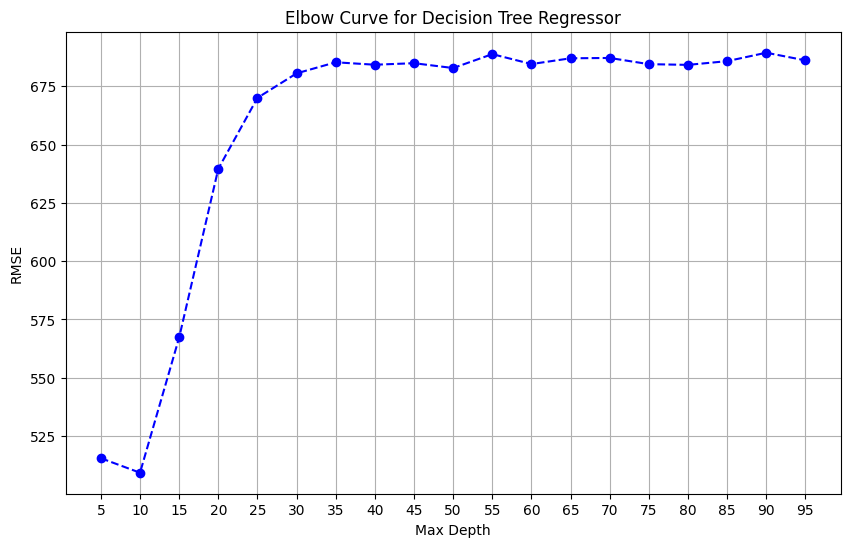

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

start = 5
end = 100
step = 5
depth_values = list(range(start, end, step))

rms_values_dt = []

for depth in tqdm(depth_values):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Evaluate the model using Mean Squared Error
    mse = mean_squared_error(y_val, y_pred)
    rms_values_dt.append(mse ** 0.5)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(depth_values, rms_values_dt, marker='o', linestyle='--', color='b')
plt.title('Elbow Curve for Decision Tree Regressor')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xticks(depth_values)
plt.grid()
plt.show()

## 2. Exhaustive search over various hyperparameters  for a Decision Tree Regressor
#### Hyperparameters used : (depth_values,criterion_values,Splitter_values)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Define the parameters to be tested
start = 5
end = 50
step = 5
depth_values = list(range(start, end, step))

criterion_values = ['squared_error', 'friedman_mse', 'poisson']
splitter_values = ['best', 'random']

# Initialize variables to store the minimum RMSE and corresponding parameters
min_rmse = float('inf')
best_params = {}

# Store RMSE values for each combination of parameters
for criterion in criterion_values:
    for splitter in splitter_values:
        rms_values = []
        for depth in tqdm(depth_values):
            model = DecisionTreeRegressor(max_depth=depth, criterion=criterion, splitter=splitter)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            # Evaluate the model using Mean Squared Error
            mse = mean_squared_error(y_val, y_pred)
            rms = mse ** 0.5
            rms_values.append(rms)

            # Update minimum RMSE and corresponding parameters
            if rms < min_rmse:
                min_rmse = rms
                best_params = {'criterion': criterion, 'splitter': splitter, 'max_depth': depth}

# Plotting the elbow curves for different parameters
# ... (code remains unchanged)

# Print the least RMSE and its corresponding parameters
print(f"\n\nLeast RMSE: {min_rmse} with parameters: {best_params}")


100%|██████████| 9/9 [00:02<00:00,  3.01it/s]



Least RMSE: 501.56995279348615 with parameters: {'criterion': 'squared_error', 'splitter': 'random', 'max_depth': 10}


## Grid Search for Decision Tree Regressor

### Hyperparameters used : (depth_values, criterion_values, splitter_values, min_samples_split, min_samples_leaf)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Define the parameter grid for grid search
param_grid_dt = {
    'max_depth': list(range(0, 20, 1)),
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()

# Define the scoring metric (MSE)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create the GridSearchCV object with verbose logging
grid_search_dt = GridSearchCV(dt_regressor, param_grid_dt, scoring=mse_scorer, cv=5, verbose=3)

# Fit the model to the data (X_train, y_train)
grid_search_dt.fit(X_train, y_train)

# Get the best estimator (model)
best_dt_regressor = grid_search_dt.best_estimator_

# Make predictions on the validation data
y_pred_dt = best_dt_regressor.predict(X_val)

# Calculate the Root Mean Squared Error (RMSE)
rms_dt = mean_squared_error(y_val, y_pred_dt) ** 0.5

# Print the best hyperparameters and RMSE
print("\n\n Finished Grid Search")


Streaming output truncated to the last 5000 lines.
[CV 1/5] END criterion=mse, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=4, min_samples_lea

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3690 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _



 Finished Grid Search


In [ ]:
print("Best Hyperparameters:", grid_search_dt.best_params_)
print(f"Root Mean Squared Error: {rms_dt}")

Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Root Mean Squared Error: 503.3085060333533


## Making predictions for the Decision Tree Regressor

In [ ]:
y_pred_test = best_dt_regressor.predict(X_test)

save_test_predictions_in_kaggle_format(y_pred_test, "Decision Tree", True)

,Id,Predicted
0,0,3261.516176
1,1,2682.246377
2,2,3371.240602
3,3,1951.875733
4,4,2719.475655
...,...,...
29995,29995,3151.908397
29996,29996,3005.785921
29997,29997,2615.123967
29998,29998,3261.516176
